<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/First%20try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First try

Loading train and testset.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

print(trainset.head())
print(trainset.shape)
print(testset.head())
print(testset.shape)
print(trainset.label.value_counts())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
(2000, 15)
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]
(12892, 15)
0    10

You see that the testset has six times more rows than the trainset and that the two classes are approximately in balance: 1099 (Class 0) and 901 (Class 1)

**Pre-processing: scaling data** Because you need your features all to have the same range of values.

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', '02', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'label']


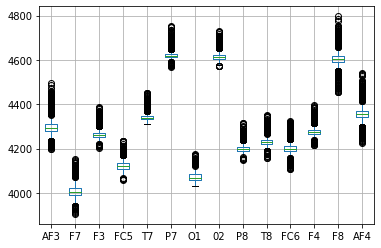

In [2]:
#defining features and labels
features = trainset.copy()
features.pop('label')
feature_names = list(trainset.columns)
print(feature_names)

#visualizing features' ranges
features.boxplot()

You can see above that the features are not scaled yet. Now I will try to scale all features (with MinMaxScaler).

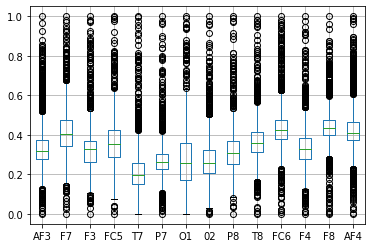

In [3]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()

features['AF3'] = feature_scaler.fit_transform(features[['AF3']])
features['F7'] = feature_scaler.fit_transform(features[['F7']])
features['F3'] = feature_scaler.fit_transform(features[['F3']])
features['FC5'] = feature_scaler.fit_transform(features[['FC5']])
features['T7'] = feature_scaler.fit_transform(features[['T7']])
features['P7'] = feature_scaler.fit_transform(features[['P7']])
features['O1'] = feature_scaler.fit_transform(features[['O1']])
features['02'] = feature_scaler.fit_transform(features[['02']])
features['P8'] = feature_scaler.fit_transform(features[['P8']])
features['T8'] = feature_scaler.fit_transform(features[['T8']])
features['FC6'] = feature_scaler.fit_transform(features[['FC6']])
features['F4'] = feature_scaler.fit_transform(features[['F4']])
features['F8'] = feature_scaler.fit_transform(features[['F8']])
features['AF4'] = feature_scaler.fit_transform(features[['AF4']])

#visualizing scaled features
features.boxplot()

Now I will look at features that could already give a good separation via distplots.

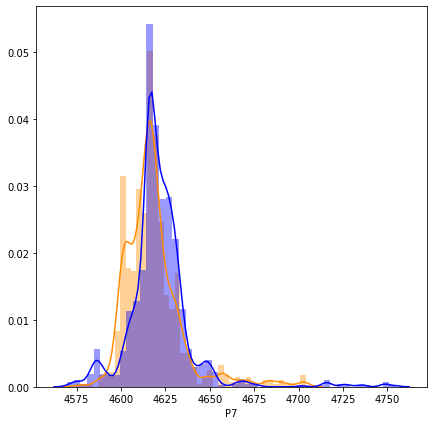

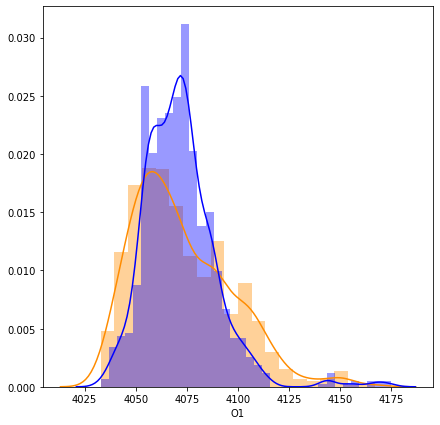

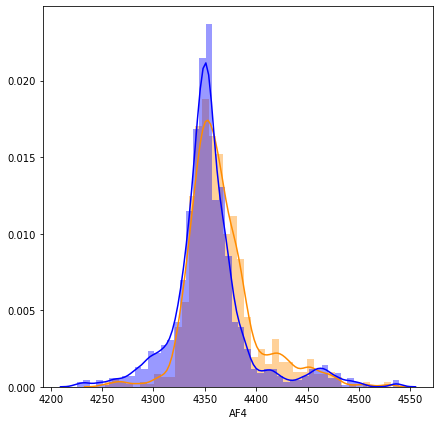

In [4]:
plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['P7'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['P7'], color="#0000FF")

plt.show()

plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['O1'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['O1'], color="#0000FF")

plt.show()

plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['AF4'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['AF4'], color="#0000FF")

plt.show()

The features 'P7', 'O1' and 'AF4' are looking to have the least overlap in the distplots, but we can't see that the two classes can be distinguished. On the contrary, this will not be easy I think...

**Model selection:** I need to choose a good (or even the best) model for this dataset. This is a two class problem, so I assume (non)linear regression is not suited for this. 

So I will start with the **logistic regression model**.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

model = LogisticRegression(C=1)

score = cross_val_score(model, features, trainset.label,cv=15).mean()
print('Cross_val_score: '+ str(score))

Cross_val_score: 0.6070212845546703


Okay this doesn't say that this is most optimal...But I can now search for better parameters.

**Model regularization**

In [6]:
from sklearn.model_selection import GridSearchCV

search_space = [0.001,0.01,0.1,1,10,100,1000]

model = LogisticRegression(max_iter= 9000)
params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params)
grid_search.fit(features, trainset.label)

print(grid_search.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=9000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [7]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

0.550 (+/-0.002) for {'C': 0.001}
0.553 (+/-0.011) for {'C': 0.01}
0.591 (+/-0.044) for {'C': 0.1}
0.606 (+/-0.046) for {'C': 1}
0.616 (+/-0.032) for {'C': 10}
0.621 (+/-0.037) for {'C': 100}
0.621 (+/-0.035) for {'C': 1000}


From the two outputs above, you can see that 100 came out as the best value for C. But you see that 1000 is also not bad, so I try to put in some more higher values for C.

In [8]:
search_space = [10,100,1000,1200,1500,2000,5000]

model = LogisticRegression(max_iter= 5000)
params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params)
grid_search.fit(features, trainset.label)

print(grid_search.best_estimator_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

LogisticRegression(C=2000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.616 (+/-0.032) for {'C': 10}
0.621 (+/-0.037) for {'C': 100}
0.621 (+/-0.035) for {'C': 1000}
0.620 (+/-0.036) for {'C': 1200}
0.621 (+/-0.037) for {'C': 1500}
0.621 (+/-0.035) for {'C': 2000}
0.621 (+/-0.035) for {'C': 5000}


These results suggest that C = 100 is indeed the best hyperparameter for this model, as going up higher doesn't level up the scores.

In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

search_space = [0.1,1,10,100,300, 600, 1000]
model = LogisticRegression(max_iter= 5000)
params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params)

cv_predictions = cross_val_score(grid_search, features, trainset.label).mean()
cv_predictions

0.6174999999999999

For tis first try that won't give good results I will try to do predictions, safe them and upload them.

In [0]:
test_features = testset.copy()
testset.pop('index')

#Scaling testset in the same way as trainset.
testset['AF3'] = feature_scaler.fit_transform(testset[['AF3']])
testset['F7'] = feature_scaler.fit_transform(testset[['F7']])
testset['F3'] = feature_scaler.fit_transform(testset[['F3']])
testset['FC5'] = feature_scaler.fit_transform(testset[['FC5']])
testset['T7'] = feature_scaler.fit_transform(testset[['T7']])
testset['P7'] = feature_scaler.fit_transform(testset[['P7']])
testset['O1'] = feature_scaler.fit_transform(testset[['O1']])
testset['02'] = feature_scaler.fit_transform(testset[['02']])
testset['P8'] = feature_scaler.fit_transform(testset[['P8']])
testset['T8'] = feature_scaler.fit_transform(testset[['T8']])
testset['FC6'] = feature_scaler.fit_transform(testset[['FC6']])
testset['F4'] = feature_scaler.fit_transform(testset[['F4']])
testset['F8'] = feature_scaler.fit_transform(testset[['F8']])
testset['AF4'] = feature_scaler.fit_transform(testset[['AF4']])

In [11]:
model = LogisticRegression(C=100, max_iter=500)
model.fit(features,trainset.label)

predictions = model.predict(testset)
predictions[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
sample_submission = pd.DataFrame({'index': test_features['index'], 'label': predictions})
sample_submission.head()

,index,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
sample_submission.to_csv(filename,index=False)